# Análise do COVID-19 no Brasil (Infectados)

## 1. Base de Dados Original

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")
df.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,59,70,75,82,114,147,177,212,272,322
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,639,639,701,773,839,825,878,889,924,963
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,178,178,200,212,226,243,266,313,345,385
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,149,149,197,238,428,566,673,790,900,1030
5,British Columbia,Canada,49.2827,-123.1207,0,0,0,0,0,0,...,39,46,64,64,73,103,103,186,231,271
6,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,65,65,92,112,134,171,210,267,307,353
7,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,21,21,36,49,57,71,94,121,121,121
8,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,20,20,35,46,61,68,78,94,144,184
9,NaN,Cambodia,11.5500,104.9167,0,0,0,0,0,1,...,3,3,5,7,7,7,33,35,37,51


## 2. Total de casos diários no mundo (ordenação decrescente)

In [2]:
def getSortedGroupByCountryDataframe(df):
    confirmedCasesGroupedDf = df.groupby('Country/Region').sum()
    sortedConfirmedCasesGroupedDf = confirmedCasesGroupedDf.sort_values(by=['Confirmed Cases'], ascending = False)
    return sortedConfirmedCasesGroupedDf

In [3]:
confirmedCasesDf = df.copy()
column_list = list(confirmedCasesDf)
column_last_day = column_list[-1:]
confirmedCasesDf = confirmedCasesDf.drop(['Province/State', 'Lat', 'Long'], axis=1)
confirmedCasesDf["Confirmed Cases"] = confirmedCasesDf[column_last_day].astype('int32')

sortedConfirmedCasesGroupedDf = getSortedGroupByCountryDataframe(confirmedCasesDf)
sortedConfirmedCasesGroupedDf.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,Confirmed Cases
Country/Region,,,,,,,,,,,,,,,,,,,,,
China,548,643,920,1406,2075,2877,5509,6087,8141,9802,...,80932,80945,80977,81003,81033,81058,81102,81156,81250,81250
Italy,0,0,0,0,0,0,0,0,0,2,...,12462,17660,21157,24747,27980,31506,35713,41035,47021,47021
Spain,0,0,0,0,0,0,0,0,0,0,...,2277,5232,6391,7798,9942,11748,13910,17963,20410,20410
Germany,0,0,0,0,0,1,4,4,4,5,...,2078,3675,4585,5795,7272,9257,12327,15320,19848,19848
Iran,0,0,0,0,0,0,0,0,0,0,...,10075,11364,12729,13938,14991,16169,17361,18407,19644,19644
US,1,1,2,2,5,5,5,5,5,7,...,1663,2179,2727,3499,4632,6421,7783,13677,19100,19100
France,0,0,2,3,3,3,4,5,5,5,...,2290,3678,4487,4523,6668,7699,9105,10947,12726,12726
"Korea, South",1,1,2,2,3,4,4,4,4,11,...,7869,7979,8086,8162,8236,8320,8413,8565,8652,8652
Switzerland,0,0,0,0,0,0,0,0,0,0,...,652,1139,1359,2200,2200,2700,3028,4075,5294,5294


### 2.1 Total de casos diários somente no Brasil

In [4]:
confirmedCasesByDayBrazilDf = sortedConfirmedCasesGroupedDf.loc[['Brazil']]
confirmedCasesByDayBrazilDf

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,Confirmed Cases
Country/Region,,,,,,,,,,,,,,,,,,,,,
Brazil,0,0,0,0,0,0,0,0,0,0,...,52,151,151,162,200,321,372,621,793,793


In [5]:
dates = list(confirmedCasesByDayBrazilDf)[:-1]
infected = confirmedCasesByDayBrazilDf.iloc[0,:-1]

dfForPlot = pd.DataFrame(
    {'date': dates, 'infected': infected})
dfForPlot['date'] = pd.to_datetime(dfForPlot['date'])
dfForPlot.tail(10)

,date,infected
3/11/20,2020-03-11,38
3/12/20,2020-03-12,52
3/13/20,2020-03-13,151
3/14/20,2020-03-14,151
3/15/20,2020-03-15,162
3/16/20,2020-03-16,200
3/17/20,2020-03-17,321
3/18/20,2020-03-18,372
3/19/20,2020-03-19,621
3/20/20,2020-03-20,793


Text(0, 0.5, 'Number of cases')

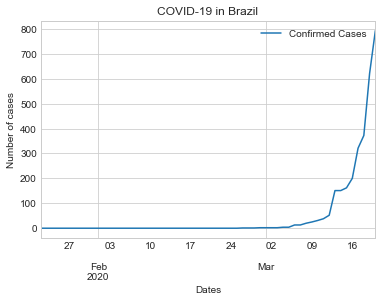

In [6]:
fig = plt.figure()
ax = plt.axes()
dfForPlot.set_index('date')['infected'].plot(legend=True, grid=True, label='Confirmed Cases');
plt.title("COVID-19 in Brazil")
plt.xlabel("Dates")
plt.ylabel("Number of cases")

### 2.2 Total de casos diários somente na Itália

In [7]:
confirmedCasesByDayItalyDf = sortedConfirmedCasesGroupedDf.loc[['Italy']]
confirmedCasesByDayItalyDf

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,Confirmed Cases
Country/Region,,,,,,,,,,,,,,,,,,,,,
Italy,0,0,0,0,0,0,0,0,0,2,...,12462,17660,21157,24747,27980,31506,35713,41035,47021,47021


In [8]:
datesItaly = list(confirmedCasesByDayItalyDf)[:-1]
infectedItaly = confirmedCasesByDayItalyDf.iloc[0,:-1]

dfForPlotItaly = pd.DataFrame(
    {'date': datesItaly, 'infected': infectedItaly})
dfForPlotItaly['date'] = pd.to_datetime(dfForPlotItaly['date'])
dfForPlotItaly.tail()

,date,infected
3/16/20,2020-03-16,27980
3/17/20,2020-03-17,31506
3/18/20,2020-03-18,35713
3/19/20,2020-03-19,41035
3/20/20,2020-03-20,47021


Text(0, 0.5, 'Number of cases')

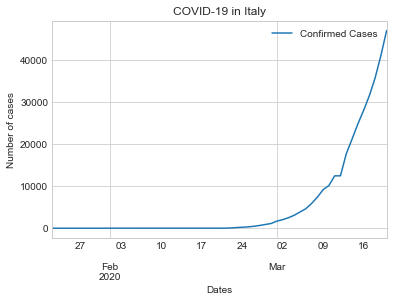

In [9]:
fig = plt.figure()
ax = plt.axes()
dfForPlotItaly.set_index('date')['infected'].plot(legend=True, grid=True, label='Confirmed Cases');
plt.title("COVID-19 in Italy")
plt.xlabel("Dates")
plt.ylabel("Number of cases")

## 3. Total de casos diários acumulados por país (ordenação decrescente)

In [10]:
confirmedCasesOnlyDf = confirmedCasesDf.drop(confirmedCasesDf.columns.difference(['Country/Region','Confirmed Cases']), 1)
confirmedCasesOnlyDf = confirmedCasesOnlyDf.sort_values(by=['Confirmed Cases'],ascending=False)

sortedConfirmedCasesOnlyGroupedDf = getSortedGroupByCountryDataframe(confirmedCasesOnlyDf)
sortedConfirmedCasesOnlyGroupedDf

,Confirmed Cases
Country/Region,
China,81250
Italy,47021
Spain,20410
Germany,19848
Iran,19644
...,...
Holy See,1
Saint Vincent and the Grenadines,1
Nepal,1


### 3.1 Total de casos diários acumulados no Brasil

In [11]:
confirmedCasesTotalBrazilDf = sortedConfirmedCasesOnlyGroupedDf.loc[['Brazil']]
confirmedCasesTotalBrazilDf

,Confirmed Cases
Country/Region,
Brazil,793


## 4. Previsão por meio da Regressão

### 4.0 Dados comuns a todos os algoritmos abaixo

In [12]:
def plotGraph(XTrained, yTrained, XReal, yReal, algorithm):
    df = pd.DataFrame(
    {'dates': X, 'infected': y.astype(int)})
    df['dates'] = pd.to_datetime(df['dates'])

    fig = plt.figure()
    ax = plt.axes()
    df.set_index('dates')['infected'].plot(legend=True, grid=True, label='Confirmed Cases');
    plt.plot(XReal, yReal, 'r:', label='Predicted Cases')
    plt.title("COVID-19 in Brazil ("+algorithm+")")
    plt.xlabel("Dates")
    plt.ylabel("Number of cases")

In [13]:
diasASimular = 60
dfForPlotCopy = dfForPlot[dfForPlot['infected'] != 0]

XTrain = dfForPlotCopy['date'] 
yTrain = dfForPlotCopy['infected']
XReal = dfForPlot['date']
yReal = dfForPlot['infected']

XTrain = np.arange(0, len(XTrain))
X = np.arange(0, len(XTrain) + diasASimular)
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83])

### 4.1 Regressão Linear

In [14]:
#treino
from sklearn.linear_model import LinearRegression
LRModel = LinearRegression()
LRModel.fit(XTrain.reshape(-1, 1), yTrain)

#predição
y = LRModel.predict(X.reshape(-1, 1)).astype(int)
y = y + y[0] * -1
y

array([   0,   22,   45,   68,   90,  113,  136,  158,  180,  203,  226,
        248,  271,  294,  317,  339,  362,  385,  407,  430,  453,  476,
        498,  521,  544,  566,  589,  612,  635,  657,  680,  703,  725,
        748,  771,  794,  816,  839,  862,  884,  907,  930,  952,  975,
        998, 1021, 1043, 1066, 1089, 1111, 1134, 1157, 1180, 1202, 1225,
       1248, 1270, 1293, 1316, 1339, 1361, 1384, 1407, 1429, 1452, 1475,
       1498, 1520, 1543, 1566, 1588, 1611, 1634, 1657, 1679, 1702, 1725,
       1747, 1770, 1793, 1816, 1838, 1861, 1884])

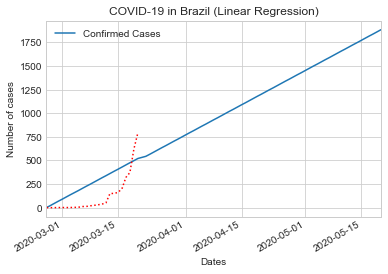

In [15]:
import datetime
X = np.append(dfForPlotCopy['date'], pd.date_range(datetime.date.today() + datetime.timedelta(days=1), periods=diasASimular, freq='D'))

plotGraph(X, y, XReal, yReal, "Linear Regression")

### 4.2 Polynomial Regression 2D

In [16]:
XTrain = dfForPlotCopy['date']
yTrain = dfForPlotCopy['infected']
XReal = dfForPlot['date']
yReal = dfForPlot['infected']

XTrain = np.arange(0, len(XTrain))
X = np.arange(0, len(XTrain) + diasASimular)

#treino
from sklearn.preprocessing import PolynomialFeatures
polynomialFeatures = PolynomialFeatures(degree = 2)
XPoly = polynomialFeatures.fit_transform(XTrain.reshape(-1, 1))

from sklearn.linear_model import LinearRegression
polyLinearRegression = LinearRegression()
polyLinearRegression.fit(XPoly, yTrain)

#predição
XPoly = polynomialFeatures.fit_transform(X.reshape(-1, 1))
y = polyLinearRegression.predict(XPoly).astype(int)
miny = min(y)
y = y + miny * -1
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83])

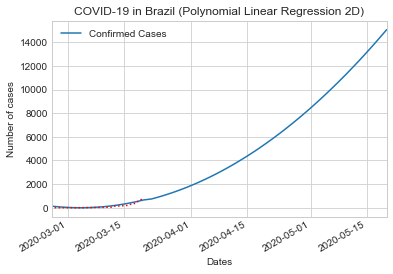

In [17]:
import datetime
X = np.append(dfForPlotCopy['date'], pd.date_range(datetime.date.today() + datetime.timedelta(days=1), periods=diasASimular, freq='D'))

plotGraph(X, y, XReal, yReal, "Polynomial Linear Regression 2D")

### 4.3 Polynomial Regression 3D

In [18]:
XTrain = dfForPlotCopy['date']
yTrain = dfForPlotCopy['infected']
XReal = dfForPlot['date']
yReal = dfForPlot['infected']

XTrain = np.arange(0, len(XTrain))
X = np.arange(0, len(XTrain) + diasASimular)

#treino
from sklearn.preprocessing import PolynomialFeatures
polynomialFeatures = PolynomialFeatures(degree = 3)
XPoly = polynomialFeatures.fit_transform(XTrain.reshape(-1, 1))

from sklearn.linear_model import LinearRegression
polyLinearRegression = LinearRegression()
polyLinearRegression.fit(XPoly, yTrain)

#predição
XPoly = polynomialFeatures.fit_transform(X.reshape(-1, 1))
y = polyLinearRegression.predict(XPoly).astype(int)
miny = min(y)
y = y + miny * -1
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83])

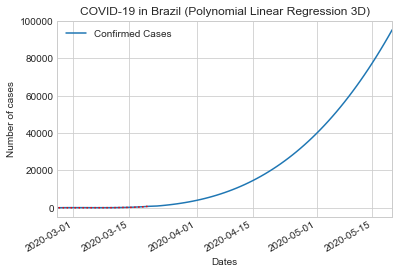

In [19]:
import datetime
X = np.append(dfForPlotCopy['date'], pd.date_range(datetime.date.today() + datetime.timedelta(days=1), periods=diasASimular, freq='D'))

plotGraph(X, y, XReal, yReal, "Polynomial Linear Regression 3D")

### 4.4 Polynomial Regression 4D

In [20]:
XTrain = dfForPlotCopy['date']
yTrain = dfForPlotCopy['infected']
XReal = dfForPlot['date']
yReal = dfForPlot['infected']

XTrain = np.arange(0, len(XTrain))
X = np.arange(0, len(XTrain) + diasASimular)

#treino
from sklearn.preprocessing import PolynomialFeatures
polynomialFeatures = PolynomialFeatures(degree = 4)
XPoly = polynomialFeatures.fit_transform(XTrain.reshape(-1, 1))

from sklearn.linear_model import LinearRegression
polyLinearRegression = LinearRegression()
polyLinearRegression.fit(XPoly, yTrain)

#predição
XPoly = polynomialFeatures.fit_transform(X.reshape(-1, 1))
y = polyLinearRegression.predict(XPoly).astype(int)
miny = min(y)
y = y + miny * -1
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83])

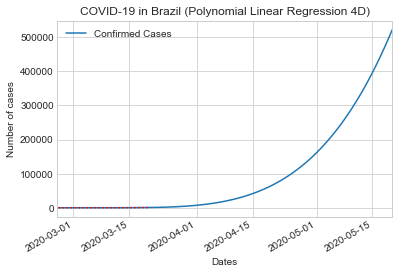

In [21]:
import datetime
X = np.append(dfForPlotCopy['date'], pd.date_range(datetime.date.today() + datetime.timedelta(days=1), periods=diasASimular, freq='D'))

plotGraph(X, y, XReal, yReal, "Polynomial Linear Regression 4D")